In [1]:
# set cell display width
from IPython.display import display, HTML
display(HTML('<style>.container { width: 930px !important; }</style>'))

In [2]:
# import ML tools
import pandas as pd
import numpy as np

In [3]:
# import plotting tools
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from IPython.core.pylabtools import figsize
# set grid size and style
figsize(12, 4)
sns.set_style('whitegrid')

Use "mp.colors(<index>)" as color attribute for Seaborn plots.
This is your color palette...


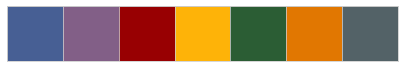

In [4]:
# import custom palette
import my_palette as mp

In [5]:
# read in actor dataset
actor_df = pd.read_json('capstone1_ref.json')

In [6]:
# groupby actor while aggregating over all other features
df = actor_df.groupby('person_id').agg(
    {'revenue': np.sum, 'budget': np.sum, 'age': np.mean, 'gender': np.mean, 
     'order':np.mean, 'popularity':np.mean, 'release_date': np.mean, 'runtime': np.mean, 
     'usa': np.mean, 'vote_average': np.mean, 'vote_count': np.sum, 
     'action': np.sum, 'adventure': np.sum, 'animation': np.sum, 'comedy': np.sum, 
     'crime': np.sum, 'drama': np.sum, 'family': np.sum, 'fantasy': np.sum, 
     'history': np.sum, 'horror': np.sum, 'music': np.sum, 'mystery': np.sum, 
     'romance': np.sum, 'science_fiction': np.sum, 'thriller': np.sum, 
     'war': np.sum, 'western': np.sum})

In [7]:
# assign better name to target
df.rename(columns={'revenue': 'actor_value'}, inplace=True)

In [8]:
# observe a bit of the data
df.head().transpose()

person_id,2,3,4,5,6
actor_value,1.136000e+10,1.838296e+10,1.170593e+10,3.443509e+09,8.831791e+09
budget,9.598281e+08,3.594353e+09,1.132195e+09,7.196726e+07,6.045216e+08
age,4.668380e+01,5.513486e+01,4.017787e+01,5.970645e+01,4.475702e+01
gender,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
order,8.181818e-01,7.619048e-01,3.000000e+00,1.666667e+00,5.666667e+00
popularity,4.413291e+01,2.541143e+01,3.299827e+01,3.716733e+01,6.011667e+01
release_date,1.997818e+03,1.997190e+03,1.996467e+03,1.972667e+03,1.990333e+03
runtime,1.128182e+02,1.190000e+02,1.152000e+02,9.766667e+01,1.323333e+02
usa,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
vote_average,7.145455e+00,6.730952e+00,6.660000e+00,7.400000e+00,7.483333e+00


In [9]:
# recall features
df.columns

Index(['actor_value', 'budget', 'age', 'gender', 'order', 'popularity',
       'release_date', 'runtime', 'usa', 'vote_average', 'vote_count',
       'action', 'adventure', 'animation', 'comedy', 'crime', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance',
       'science_fiction', 'thriller', 'war', 'western'],
      dtype='object')

In [10]:
# create list of non-genre feature names
non_genre_lst = ['actor_value', 'budget', 'age', 'gender', 'order', 'popularity',
                 'release_date', 'runtime', 'usa', 'vote_average', 'vote_count']

In [11]:
# create list of genre feature names
genre_lst = np.setdiff1d(df.columns, non_genre_lst)

In [12]:
# observe non-genre statistics
df[non_genre_lst].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
actor_value,11693.0,5.647359e+08,1.243346e+09,1.238841,3.130126e+07,1.396449e+08,5.060413e+08,1.970652e+10
budget,11693.0,1.766035e+08,3.569200e+08,1.600217,1.700949e+07,5.355083e+07,1.675207e+08,5.316126e+09
age,11693.0,3.786080e+01,1.400356e+01,1.182776,2.787463e+01,3.614859e+01,4.673333e+01,9.896165e+01
gender,11693.0,3.919439e-01,4.882051e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
order,11693.0,4.420431e+00,2.109674e+00,0.000000,3.000000e+00,4.500000e+00,6.000000e+00,8.000000e+00
popularity,11693.0,1.325834e+01,8.071933e+00,0.600000,9.088500e+00,1.287200e+01,1.615000e+01,2.052800e+02
release_date,11693.0,1.996125e+03,2.029432e+01,1913.000000,1.988000e+03,2.002600e+03,2.010417e+03,2.020000e+03
runtime,11693.0,1.079509e+02,1.763976e+01,70.000000,9.650000e+01,1.056667e+02,1.160000e+02,2.480000e+02
usa,11693.0,4.452236e-01,4.970117e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
vote_average,11693.0,6.403431e+00,8.449075e-01,1.000000,5.953846e+00,6.400000e+00,6.885714e+00,1.000000e+01


In [13]:
# observe genre statistics
df[genre_lst].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
action,11693.0,0.972975,1.975938,0.0,0.0,0.0,1.0,38.0
adventure,11693.0,0.673993,1.441506,0.0,0.0,0.0,1.0,23.0
animation,11693.0,0.181048,0.658617,0.0,0.0,0.0,0.0,11.0
comedy,11693.0,1.279826,2.489980,0.0,0.0,1.0,1.0,34.0
crime,11693.0,0.582571,1.364646,0.0,0.0,0.0,1.0,27.0
drama,11693.0,1.644146,2.809986,0.0,0.0,1.0,2.0,33.0
family,11693.0,0.381681,0.982726,0.0,0.0,0.0,0.0,15.0
fantasy,11693.0,0.363636,0.901201,0.0,0.0,0.0,0.0,17.0
history,11693.0,0.156931,0.521274,0.0,0.0,0.0,0.0,9.0
horror,11693.0,0.397674,0.773581,0.0,0.0,0.0,1.0,11.0


I will start by analyzing a possible correlation between an actor's age and that actor's gender.

In [14]:
# get the correlation coefficient between actor age and gender
df.loc[:, ['age', 'gender']].corr()

,age,gender
age,1.000000,-0.220169
gender,-0.220169,1.000000


In [15]:
# split age variable by gender and make into two Series
male_age = df.loc[df['gender'] == 0]['age']
female_age = df.loc[df['gender'] == 1]['age']

In [16]:
# observe mean and quartiles
pd.DataFrame([male_age.rename('male').describe(), female_age.rename('female').describe()], 
             columns=male_age.describe().index.tolist())

,count,mean,std,min,25%,50%,75%,max
male,7110.0,40.336032,13.939950,1.182776,30.754225,39.863926,49.460975,98.961649
female,4583.0,34.020767,13.215305,2.327221,25.459797,31.513994,40.342375,92.231873


The average age of male actors is 6 years older than the that of female actors.

I will normalize the data and plot the distributions.

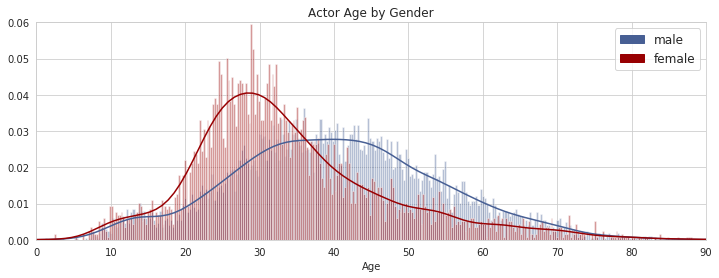

In [17]:
# plot age distributions of genders

plt.xlim(0, 90)
plt.ylim(0, 0.06)

sns.distplot(male_age, norm_hist=True, bins=350, color=mp.colors(0))
sns.distplot(female_age, norm_hist=True, bins=350, color=mp.colors(2))

plt.xlabel('Age')

# make color keys for legend
blue_patch = mpatches.Patch(color=mp.colors(0), label='male')
red_patch = mpatches.Patch(color=mp.colors(2), label='female')

plt.legend(handles=[blue_patch, red_patch], fontsize='large')
plt.title('Actor Age by Gender');

The plot shows the female actors getting more of their roles at a younger age than the male actors.<br>
Also, there is bimodality in the distributions of both genders, indicating a decline in the number of roles for teen actors.

I will conduct a hypothesis test to compare the two distributions.

H_0: There is not a significant difference in the distribution of ages between male and female actors.<br>
H_A: There is a significant difference in the distribution of ages between male and female actors.

In [18]:
def perm_sample(data1, data2):
    """Generate permutation samples for 2 arrays"""
    # combine arrays
    data = np.concatenate((data1, data2))
    # permutate data
    perm_data = np.random.permutation(data)
    # draw samples with replacement
    perm_sample_1 = perm_data[:len(data1)]
    perm_sample_2 = perm_data[:len(data2)]
    
    return perm_sample_1, perm_sample_2

In [19]:
def draw_perm_samples(data1, data2, size=1):
    """Generate permutation samples multiple times"""
    for _ in range(size):
        perm_samp_1, perm_samp_2 = perm_sample(data1, data2)
        
    return perm_samp_1, perm_samp_2

In [20]:
# gernerate 10,000 permutation samples
np.random.seed(27)
perm_sample_male, perm_sample_female = draw_perm_samples(male_age, female_age, size=10000)

In [21]:
def ecdf(data):
    """Compute Emperical Cumulative Distribution Function for 1-Dim array"""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    
    return x, y

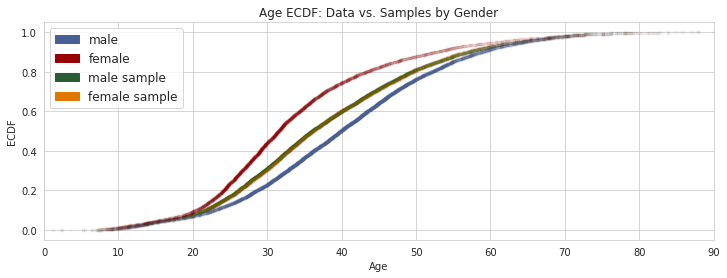

In [22]:
# plot Emperical Cumulative Distribution Functions for samples and data

plt.xlim(0, 90)

x_1, y_1 = ecdf(perm_sample_male)
x_2, y_2 = ecdf(perm_sample_female)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(4) , alpha=0.02)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(5), alpha=0.01)

x_1, y_1 = ecdf(male_age)
x_2, y_2 = ecdf(female_age)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.02)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.02)

plt.xlabel('Age')
plt.ylabel("ECDF")

# make color keys for legend
green_patch = mpatches.Patch(color=mp.colors(4), label='male sample')
orange_patch = mpatches.Patch(color=mp.colors(5), label='female sample')

plt.legend(handles=[blue_patch, red_patch, green_patch, orange_patch], fontsize='large')

plt.title('Age ECDF: Data vs. Samples by Gender');

The permutation samples overlap to make the pea soup colored curve in the middle.<br>
Between ages 20 and 60, the observed data does not overlap.<br>
The null hypothesis is not commensurate with the data.<br>
Let's put some numbers on that statement.<br>
I will compare the actors' mean age difference.

In [23]:
def diff_of_means(data1, data2):
    """Calculate the difference of the means of 2 arrays"""
    diff = np.mean(data1) - np.mean(data2)
    
    return diff

In [24]:
# get observed mean age difference
mean_age_diff_obs = diff_of_means(male_age, female_age)

In [25]:
# get average mean age difference of data
f'Data age difference: {mean_age_diff_obs:.1f} years.'

'Data age difference: 6.3 years.'

In [26]:
# get average mean age difference of samples
f'Sample age difference: {diff_of_means(perm_sample_male, perm_sample_female):.1f} years.'

'Sample age difference: -0.1 years.'

The evidence is strong against the null hypothesis.<br>
I will calculate the probability of getting at least a mean age difference of 6.3 years under the null hypothesis.

In [27]:
def draw_perm_reps(data1, data2, func, size=1):
    """Generate multiple permutation replicates"""
    # instantiate replicates array
    perm_reps = np.empty(size)
    for i in range(size):
        perm_samp_1, perm_samp_2 = perm_sample(data1, data2)
        perm_reps[i] = func(perm_samp_1, perm_samp_2)
        
    return perm_reps

In [28]:
# create replicates of mean age difference
np.random.seed(27)
perm_reps_age = draw_perm_reps(male_age, female_age, diff_of_means, size=10000)

In [29]:
# compute p-value
p_chance = np.sum(perm_reps_age >= mean_age_diff_obs) / len(perm_reps_age)
f'The p-value is: {p_chance}.'

'The p-value is: 0.0.'

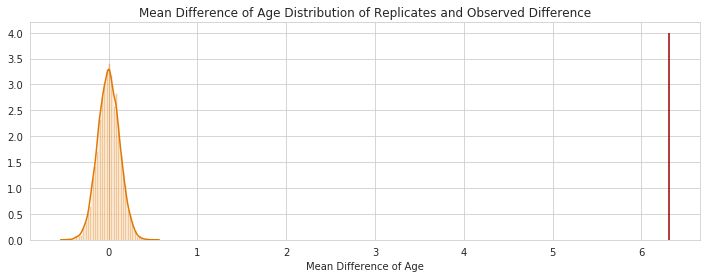

In [30]:
# plot permutation replicates and compare with observed mean difference

sns.distplot(perm_reps_age, color=mp.colors(5))
plt.vlines(mean_age_diff_obs, ymin=0, ymax=4, colors=mp.colors(2))

plt.xlabel('Mean Difference of Age')

plt.title('Mean Difference of Age Distribution of Replicates and Observed Difference');

The probability is very low that we will see at least a difference of 6.3 years by chance when the distibutions are the same.

Now, I will perform a two-sample bootstrap hypothesis test for the difference of the mean age of actors.<br>
This is testing to see if the genders have the same mean age, but not necessarily the same distribution.

H_0: There is not a significant difference in the mean of age between male and female actors.<br>
H_A: There is a significant difference in the mean of age between male and female actors.

In [31]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates"""
    # instantiate replicates array
    bs_reps = np.empty(size)
    for i in range(size):
        bs_reps[i] = func(np.random.choice(data, len(data)))
        
    return bs_reps

In [32]:
# get mean of all ages
mean_age = np.mean(df['age'])

In [33]:
# generate shifted arrays having same mean
male_shifted = male_age - np.mean(male_age) + mean_age
female_shifted = female_age - np.mean(female_age) + mean_age 

In [34]:
# get 10,000 bootstrap replicates from shifted arrays
N = 10000
bs_reps_male = draw_bs_reps(male_shifted, np.mean, N)
bs_reps_female = draw_bs_reps(female_shifted, np.mean, N)

In [35]:
# get replicates of difference of means
bs_reps = bs_reps_male - bs_reps_female

In [36]:
# get p-value
p_diff = np.sum(bs_reps >= mean_age_diff_obs) / N
f'The p-value is: {p_diff}.'

'The p-value is: 0.0.'

This is the fraction of replicates with a difference in means greater than or equal to the observed difference of 6.3 years.<br>

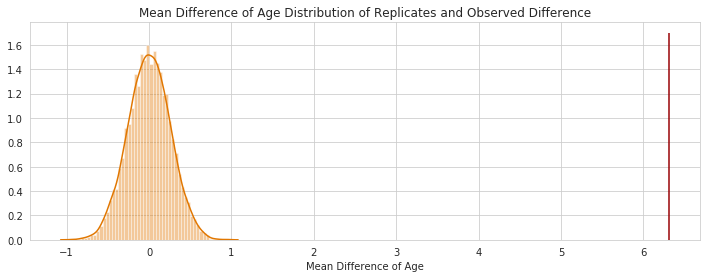

In [37]:
# plot bootstrap replicates and compare with observed mean difference

sns.distplot(bs_reps, color=mp.colors(5))
plt.vlines(mean_age_diff_obs, ymin=0, ymax=1.7, colors=mp.colors(2))

plt.xlabel('Mean Difference of Age')

plt.title('Mean Difference of Age Distribution of Replicates and Observed Difference');

Similarly, this null hypothesis concerning the difference in mean ages of actors is highly unlikely.

Now, let's look at the distribution of the dependent variable, actor value.

In [38]:
# split actor value variable by gender and put into Series
male_val = df.loc[df['gender'] == 0]['actor_value']
female_val = df.loc[df['gender'] == 1]['actor_value']

In [39]:
# observe mean and quartiles
pd.DataFrame([male_val.rename('male').describe(), female_val.rename('female').describe()], 
             columns=male_val.describe().index.tolist())

,count,mean,std,min,25%,50%,75%,max
male,7110.0,6.414587e+08,1.380562e+09,8.586660,3.701693e+07,1.599524e+08,5.778715e+08,1.970652e+10
female,4583.0,4.457091e+08,9.820047e+08,1.238841,2.466139e+07,1.125738e+08,4.060812e+08,1.469103e+10


The male actors have a higher mean value than the female actors, as well as the highest actor value overall.

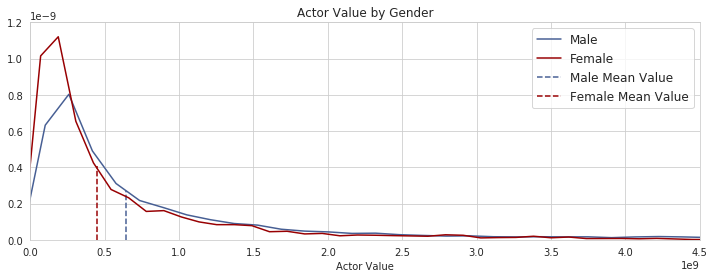

In [40]:
# plot actor value distributions of genders

plt.xlim(0, 4.5e9)
plt.ylim(0, 1.2e-9)

sns.kdeplot(male_val,color=mp.colors(0), label='Male')
plt.vlines(x=np.mean(male_val), ymin=0, ymax=2.7e-10, color=mp.colors(0), 
           label='Male Mean Value', linestyles='dashed')

sns.kdeplot(female_val, color=mp.colors(2),label='Female')
plt.vlines(x=np.mean(female_val), ymin=0, ymax=4.1e-10, color=mp.colors(2), 
           label='Female Mean Value', linestyles='dashed')

plt.xlabel('Actor Value')

plt.legend(fontsize='large')
plt.title('Actor Value by Gender');

The distributions are close in shape, but the female actors cluster at lower actor values.<br>
I'll do more ECDF comparision.

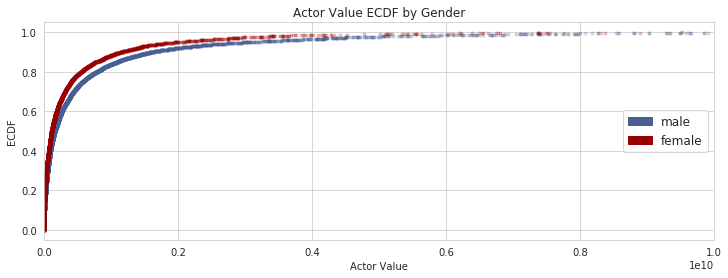

In [41]:
# plot Emperical Cumulative Distribution Functions for actor value by gender

plt.xlim(0, 1e10)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.2)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.2)

plt.xlabel('Actor Value')
plt.ylabel("ECDF")

plt.legend(handles=[blue_patch, red_patch], loc=5, fontsize='large')
plt.title('Actor Value ECDF by Gender');

The ECDFs are overlapping up to a certain point.<br>
Let's look closer where the values diverge near the top.

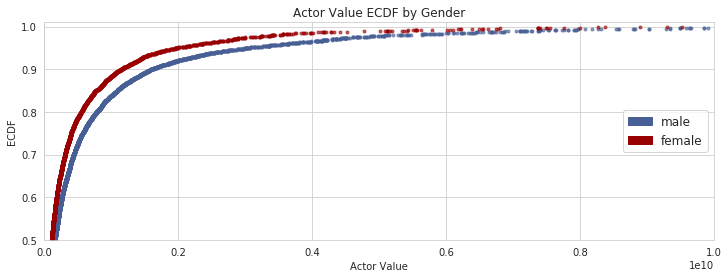

In [42]:
# plot Emperical Cumulative Distribution Functions for actor value by gender

# zoom in where distributions begin to diverge
plt.xlim(0, 1e10)
plt.ylim(0.5, 1.01)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.6)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.6)

plt.xlabel('Actor Value')
plt.ylabel("ECDF")

plt.legend(handles=[blue_patch, red_patch], loc=5, fontsize='large')
plt.title('Actor Value ECDF by Gender');

Here we can see where the female actors are counting a greater portion of their numbers at lower values than the men.<br>
From this plot, it would appear that he distributions are not the same.

Although completely unnecessary, I'll zoom in on the last few observations in the ECDF.

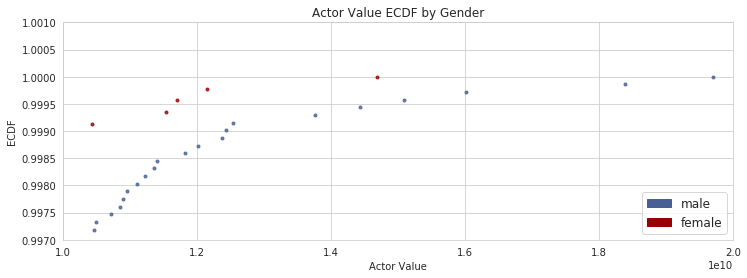

In [43]:
# plot Emperical Cumulative Distribution Functions for actor value by gender

# zoom in on actors with highest values
plt.xlim(1e10, 2e10)
plt.ylim(0.997, 1.001)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.8)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.8)

plt.xlabel('Actor Value')
plt.ylabel("ECDF")

plt.legend(handles=[blue_patch, red_patch], loc=4, fontsize='large')
plt.title('Actor Value ECDF by Gender');

There are 21 male actors and 5 female actors with a career movie revenue over $10 billion.<br>
Just to make the analysis a bit more tangible, I'll identify these actors at the top of the scale.

In [44]:
# get index of top actors
super_elite_ixd = df[df['actor_value'] > 1e10].index.to_list()

In [45]:
# extract actor names from reference dataset
print(np.unique(actor_df.loc[actor_df['person_id'].isin(super_elite_ixd)]['name']))

['Alan Rickman' 'Bruce Willis' 'Carrie Fisher' 'Chris Evans'
 'Chris Hemsworth' 'Daniel Radcliffe' 'Don Cheadle' 'Dwayne Johnson'
 'Eddie Murphy' 'Emma Watson' 'Gary Oldman' 'Harrison Ford'
 'Helena Bonham Carter' 'Ian McKellen' 'Jeremy Renner' 'Johnny Depp'
 'Mark Hamill' 'Morgan Freeman' 'Ralph Fiennes' 'Robert Downey Jr.'
 'Samuel L. Jackson' 'Scarlett Johansson' 'Tom Cruise' 'Tom Hanks'
 'Verna Felton' 'Will Smith']


All of these actors are modern stars, except Verna Felton.<br>
She did many voices for the Disney animated films of the 50's and 60's.<br>
If Disney was the Marvel Studio in the mid 1900's, she was their Scarlett Johansson.

I will conduct another hypothesis test to compare the two distributions.

H_0: There is not a significant difference in the distribution of actor values between male and female actors.<br>
H_A: There is a significant difference in the distribution of actor values between male and female actors.

In [46]:
# gernerate 10,000 permutation samples
np.random.seed(27)
perm_sample_male_val, perm_sample_female_val = draw_perm_samples(male_val, female_val, size=10000)

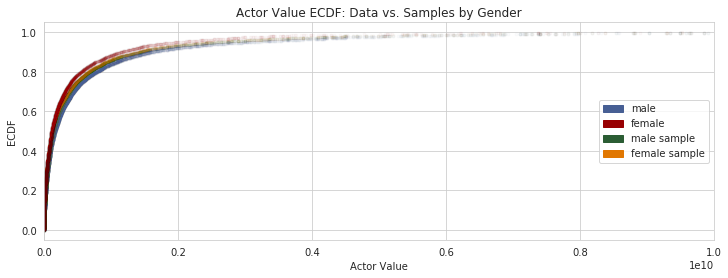

In [47]:
# plot Emperical Cumulative Distribution Functions for samples and data

plt.xlim(0, 1e10)

x_1, y_1 = ecdf(perm_sample_male_val)
x_2, y_2 = ecdf(perm_sample_female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(4) , alpha=0.02)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(5), alpha=0.02)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.02)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.02)

plt.xlabel('Actor Value')
plt.ylabel("ECDF")

plt.legend(handles=[blue_patch, red_patch, green_patch, orange_patch], loc=5)
plt.title('Actor Value ECDF: Data vs. Samples by Gender');

The sample curves overlay tightly.<br>
Let's zoom in to observe the data.

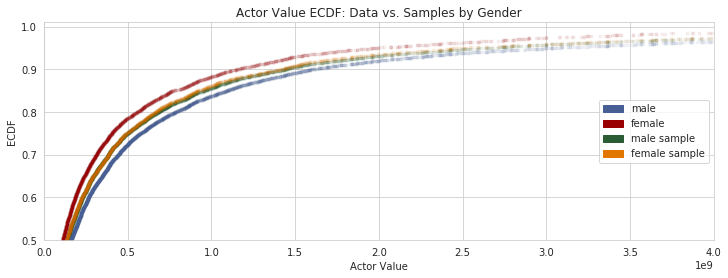

In [48]:
# plot Emperical Cumulative Distribution Functions for samples and data

# zoom in where distributions begin to diverge

plt.xlim(0, 4e9)
plt.ylim(0.5, 1.01)

x_1, y_1 = ecdf(perm_sample_male_val)
x_2, y_2 = ecdf(perm_sample_female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(4) , alpha=0.05)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(5), alpha=0.05)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.05)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.05)

plt.xlabel('Actor Value')
plt.ylabel("ECDF")

plt.legend(handles=[blue_patch, red_patch, green_patch, orange_patch], loc=5)
plt.title('Actor Value ECDF: Data vs. Samples by Gender');

The samples coincide in this range, unlike the actor data.<br>
There is a clear distinction between the distributions of samples and the true data.

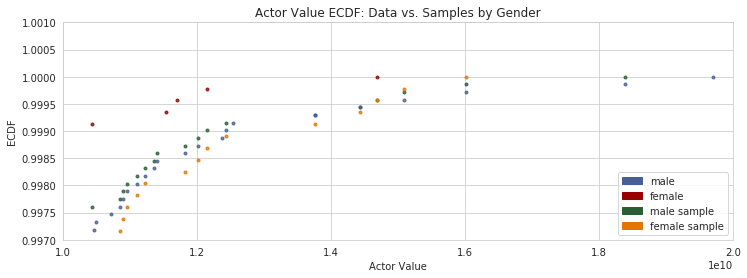

In [49]:
# plot Emperical Cumulative Distribution Functions for samples and data

# zoom in on actors with highest values
plt.xlim(1e10, 2e10)
plt.ylim(0.997, 1.001)

x_1, y_1 = ecdf(perm_sample_male_val)
x_2, y_2 = ecdf(perm_sample_female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(4) , alpha=0.8)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(5), alpha=0.8)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.8)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.8)

plt.legend(handles=[blue_patch, red_patch, green_patch, orange_patch], loc=4)

plt.xlabel('Actor Value')
plt.ylabel("ECDF")
plt.title('Actor Value ECDF: Data vs. Samples by Gender');

By observing the fair number of yellow female samples, it is evident the permutation generator is not gender biased.

Now, I will compare the mean actor value difference.

In [50]:
# get observed mean actor value difference
mean_val_diff_obs = diff_of_means(male_val, female_val)

In [51]:
# get average mean actor value difference of data
f'Data difference: ${mean_val_diff_obs:,.2f}.'

'Data difference: $195,749,566.18.'

In [52]:
# # get average mean actor value difference of samples
f'Sample difference: ${diff_of_means(perm_sample_male_val, perm_sample_female_val):,.2f}.'

'Sample difference: $10,288,743.62.'

From these means, it doesn't look good for the null hypothesis.<br>
It's time to use statistics.<br>
I'll calculate the probability of getting a mean actor value difference of $195,749,566.18 or more under the null hypothesis.

In [53]:
# create replicates of mean actor value difference
np.random.seed(27)
perm_reps_val = draw_perm_reps(male_val, female_val, diff_of_means, size=10000)

In [54]:
# compute p-value
p_val = np.sum(perm_reps_val >= mean_val_diff_obs) / len(perm_reps_val)
f'The p-value is: {p_val}.'

'The p-value is: 0.0.'

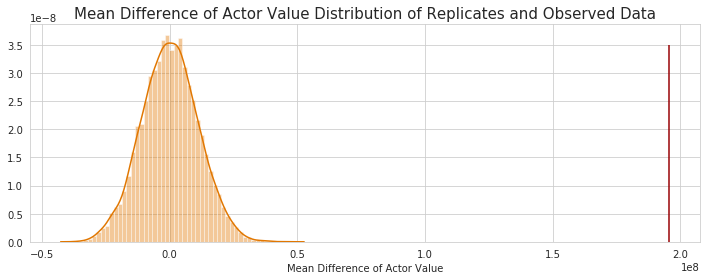

In [55]:
# plot permutation replicates and compare with observed mean difference

sns.distplot(perm_reps_val, color=mp.colors(5))
plt.vlines(mean_val_diff_obs, ymin=0, ymax=3.5e-8, colors=mp.colors(2))

plt.xlabel('Mean Difference of Actor Value')
plt.title('Mean Difference of Actor Value Distribution of Replicates and Observed Data',
          fontsize=15);

It's highly unlikely to see at least a difference of $195,749,566.18 by chance when the distibutions are the same.<br>
The null hypothesis can be rejected.

Finally, I will investigate the small positive correlation coefficient with respect to the target variable and gender.

In [56]:
# get the correlation coefficient between actor age and gender
df.loc[:, ['actor_value', 'gender']].corr()

,actor_value,gender
actor_value,1.000000,-0.076862
gender,-0.076862,1.000000


H_0: There is not a significant linear correlation between actor value and gender.<br>
H_A: There is a significant linear correlation between actor value and gender.

In [57]:
def pearson_r(x, y):
    """Compute correlation coefficient between 2 arrays"""
    corr_mat = np.corrcoef(x, y)
    
    return corr_mat[0, 1]

In [58]:
# get observed correlation
corr_obs = pearson_r(df['actor_value'], df['gender'])

In [59]:
# initialize permutation replicates
perm_replicates = np.empty(10000)
# draw replicates
np.random.seed(27)
for i in range(10000):
    # permute both sets of values
    vals_permuted = np.random.permutation(df['actor_value'])
    gender_permuted = np.random.permutation(df['gender'])
    # get correlation coefficients
    perm_replicates[i] = pearson_r(vals_permuted, gender_permuted)

In [60]:
# compute p-value
p_corr = np.sum(perm_replicates <= corr_obs) / len(perm_replicates)
f'The p-value is: {p_corr}.'

'The p-value is: 0.0.'

Here, the extreme value of the Pearson correlation coefficient is negative.<br>
So, I counted the percentage of replicates whose correlation coefficients were less than that of the observed data.

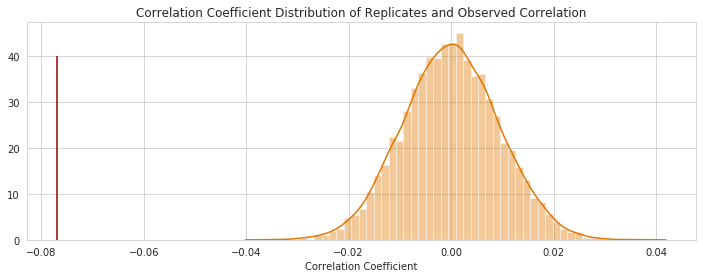

In [61]:
# plot permutation replicates and compare with observed correlation

sns.distplot(perm_replicates, color=mp.colors(5))
plt.vlines(corr_obs, ymin=0, ymax=40, colors=mp.colors(2))

plt.xlabel('Correlation Coefficient')
plt.title('Correlation Coefficient Distribution of Replicates and Observed Correlation');

It is highly unlikely to get a correlation coefficient as extreme as -0.076862 by chance if there is not a true correlation.<br>
The null hypothesis is rejected a final time.<br>
It is reasonable to believe that there is a significant correlation between actor value and gender.